In [3]:
# Library import
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Flatten, Dense, Dropout, Input, MaxPool2D, Activation, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras import models, layers, optimizers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
# Get image directories
base_dir = 'Landscapes'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# Create Image Generators
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.20)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Get train data with 0.2 split for validation
train_data = datagen.flow_from_directory(
							train_dir,
							target_size = (224, 224),
							batch_size = 32,
							class_mode ='categorical',
                            subset="training")

Found 11230 images belonging to 6 classes.


In [5]:
# Get validation data
val_data = datagen.flow_from_directory(
							train_dir,
							target_size = (224, 224),
							batch_size = 32,
							class_mode ='categorical',
                            subset="validation")

Found 2804 images belonging to 6 classes.


In [6]:
# Get test data
test_data = test_datagen.flow_from_directory(
							test_dir,
							target_size = (224, 224),
							batch_size = 32,
							class_mode ='categorical')

Found 3000 images belonging to 6 classes.


In [7]:
# inception V3 transfer learning
inceptionV3 = InceptionV3(include_top= False, input_shape=(224,224,3))

for layer in inceptionV3.layers:
	layer.trainable = False

In [8]:
# Get last layer output
last_layer = inceptionV3.get_layer('mixed9')
last_output = last_layer.output

In [9]:
# Create first model
iV3_model = Flatten()(last_output)
iV3_model = Dense(64, activation="relu")(iV3_model)
iV3_model = Dropout(0.2)(iV3_model)
iV3_model = Dense(6, activation="softmax")(iV3_model)
iV3_model = Model(inceptionV3.input, iV3_model)

In [17]:
# Create the learning rate reduction
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.000003)

In [11]:
# Compile model
iV3_model.compile(loss = 'categorical_crossentropy', optimizer= 'Adam', metrics=['acc'])

In [12]:
# Train model
history = iV3_model.fit(train_data,
                    steps_per_epoch = 150,
                    epochs = 20,
                    verbose = 1,
                    validation_data = val_data,
                    callbacks=[lr_reduction])

Epoch 1/20
150/150 [==============================] - 105s 590ms/step - loss: 0.3898 - acc: 0.8619 - val_loss: 0.2753 - val_acc: 0.9087
Epoch 2/20
150/150 [==============================] - 74s 494ms/step - loss: 0.2851 - acc: 0.9050 - val_loss: 0.2766 - val_acc: 0.9005

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 3/20
150/150 [==============================] - 71s 475ms/step - loss: 0.2264 - acc: 0.9212 - val_loss: 0.2335 - val_acc: 0.9183
Epoch 4/20
150/150 [==============================] - 66s 440ms/step - loss: 0.1867 - acc: 0.9300 - val_loss: 0.2253 - val_acc: 0.9201
Epoch 5/20
150/150 [==============================] - 64s 430ms/step - loss: 0.1779 - acc: 0.9317 - val_loss: 0.2372 - val_acc: 0.9219
Epoch 6/20
150/150 [==============================] - 66s 437ms/step - loss: 0.1680 - acc: 0.9402 - val_loss: 0.2155 - val_acc: 0.9290
Epoch 7/20
150/150 [==============================] - 64s 428ms/step - loss: 0.1536 - acc: 0.9406 - val_loss

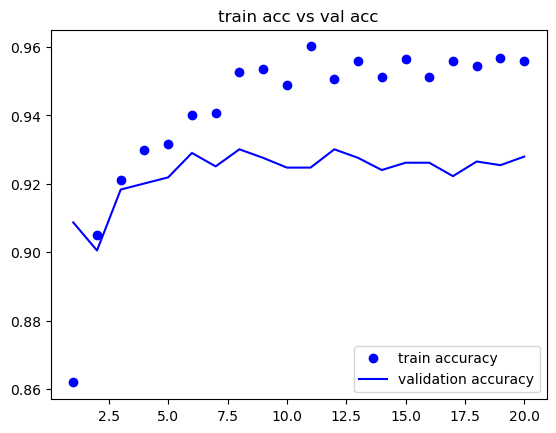

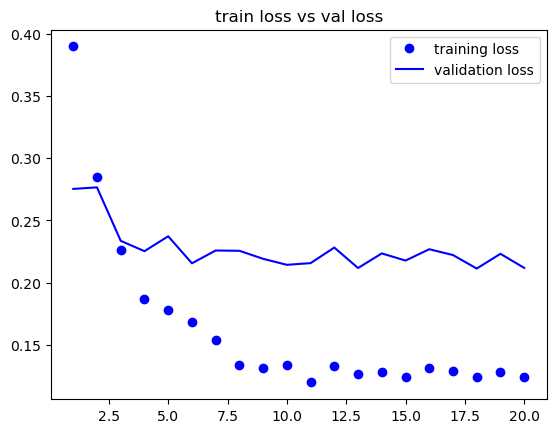

In [13]:
# Plot results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [14]:
# Creation of second model
iV3_model2 = Flatten()(last_output)
iV3_model2 = Dense(32, activation="relu")(iV3_model2)
iV3_model2 = Dropout(0.5)(iV3_model2)
iV3_model2 = Dense(6, activation="softmax")(iV3_model2)
iV3_model2 = Model(inceptionV3.input, iV3_model2)

In [15]:
# Compile second model
iV3_model2.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

In [18]:
# Train second model
history = iV3_model2.fit(train_data,
                    steps_per_epoch = 100,
                    epochs = 20,
                    verbose = 1,
                    validation_data = val_data,
                    callbacks=[lr_reduction])

Epoch 1/20
100/100 [==============================] - 55s 508ms/step - loss: 0.8688 - acc: 0.7008 - val_loss: 0.4415 - val_acc: 0.8680
Epoch 2/20
100/100 [==============================] - 46s 463ms/step - loss: 0.6359 - acc: 0.7903 - val_loss: 0.3310 - val_acc: 0.8980
Epoch 3/20
100/100 [==============================] - 47s 470ms/step - loss: 0.5245 - acc: 0.8215 - val_loss: 0.2765 - val_acc: 0.9091
Epoch 4/20
100/100 [==============================] - 48s 479ms/step - loss: 0.5563 - acc: 0.8044 - val_loss: 0.3527 - val_acc: 0.8912

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/20
100/100 [==============================] - 57s 575ms/step - loss: 0.4654 - acc: 0.8462 - val_loss: 0.2743 - val_acc: 0.9141
Epoch 6/20
100/100 [==============================] - 56s 565ms/step - loss: 0.4399 - acc: 0.8531 - val_loss: 0.2794 - val_acc: 0.9158
Epoch 7/20
100/100 [==============================] - 55s 553ms/step - loss: 0.4599 - acc: 0.8462 - val_loss:

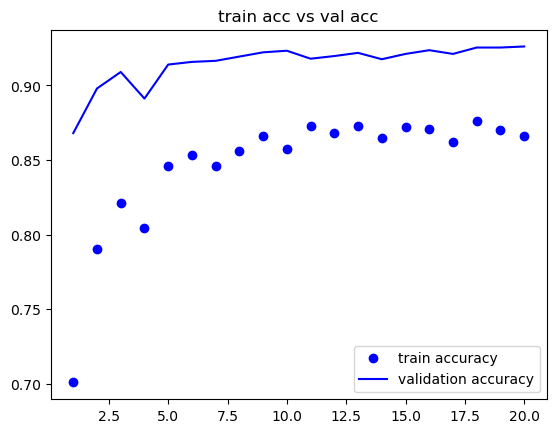

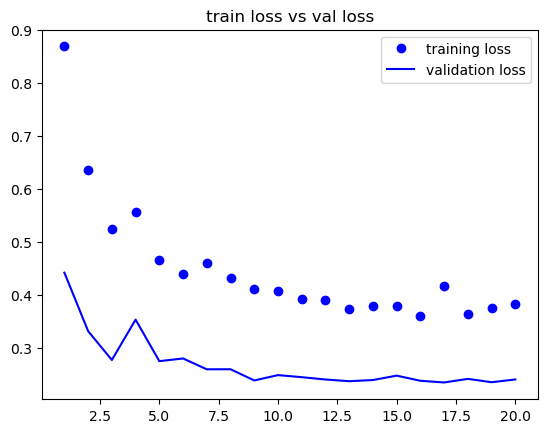

In [19]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [20]:
# Get steps for test
steps_size_test = test_data.n//test_data.batch_size

In [21]:
# Evaluate first model
test_loss, test_acc = iV3_model.evaluate(test_data, steps = 3)
print('\nTest Accuracy First Model:\n', test_acc)

3/3 [==============================] - 1s 191ms/step - loss: 0.3219 - acc: 0.8750

Test Accuracy First Model:
 0.875


In [22]:
# Evaluate second model
test_loss, test_acc = iV3_model2.evaluate(test_data, steps = 3)
print('\nTest Accuracy First Model:\n', test_acc)

3/3 [==============================] - 1s 243ms/step - loss: 0.2242 - acc: 0.9375

Test Accuracy First Model:
 0.9375


In [24]:
# Save model with best accuracy
iV3_model2.save('best_model_iv3.h5')

In [4]:
# Load model to make predictions
best_model_loaded = models.load_model("best_model_iV3.h5")

In [5]:
# Function for predictions
def predict(img_rel_path):
    # Import Image from the path
    img = image.load_img(img_rel_path, target_size=(224, 224))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values
    img = np.array(img)/255.0

    # Plotting the original image
    plt.title("Image to predict")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the label of the predicition
    p = best_model_loaded.predict(img[np.newaxis, ...])

    # Labels 
    labels = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

    # Printing the results 
    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classification:", predicted_class, "\n")

    classes=[]
    probability=[]

    # Get individual probability to see possible errors
    print("\nIndividual Probability:")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        probability.append(round(j*100,2))

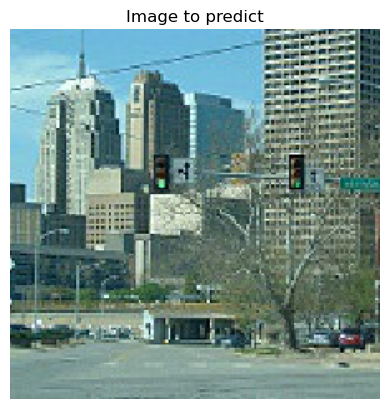



Maximum Probability:  0.919211
Classification: buildings 


Individual Probability:
BUILDINGS : 91.92 %
FOREST : 0.05 %
GLACIER : 0.01 %
MOUNTAIN : 0.24 %
SEA : 4.35 %
STREET : 3.43 %


In [6]:
# Forest class predictions
predict("Landscapes/test/buildings/20060.jpg")

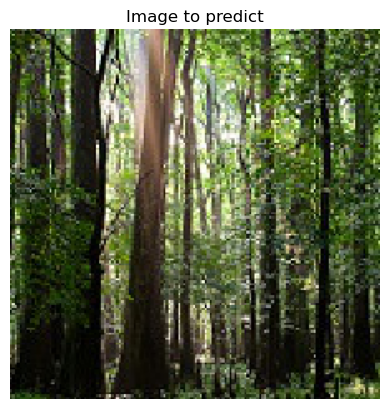



Maximum Probability:  1.0
Classification: forest 


Individual Probability:
BUILDINGS : 0.0 %
FOREST : 100.0 %
GLACIER : 0.0 %
MOUNTAIN : 0.0 %
SEA : 0.0 %
STREET : 0.0 %


In [31]:
# Forest class predictions
predict("Landscapes/test/forest/20447.jpg")

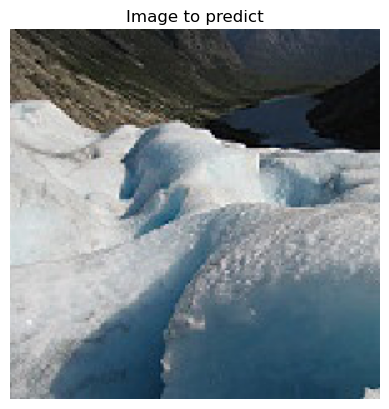



Maximum Probability:  0.9999995
Classification: glacier 


Individual Probability:
BUILDINGS : 0.0 %
FOREST : 0.0 %
GLACIER : 100.0 %
MOUNTAIN : 0.0 %
SEA : 0.0 %
STREET : 0.0 %


In [32]:
# Glacier predicions
predict("Landscapes/test/glacier/20508.jpg")

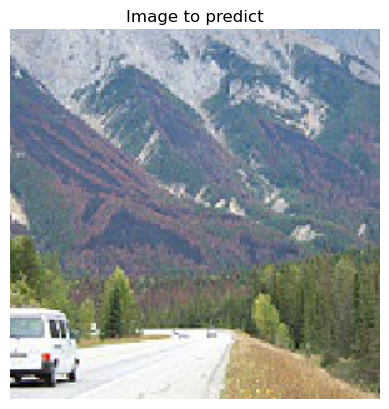



Maximum Probability:  0.7310052
Classification: mountain 


Individual Probability:
BUILDINGS : 0.0 %
FOREST : 0.01 %
GLACIER : 26.88 %
MOUNTAIN : 73.1 %
SEA : 0.0 %
STREET : 0.0 %


In [34]:
# Mountain class predicions
predict("Landscapes/test/mountain/20157.jpg")

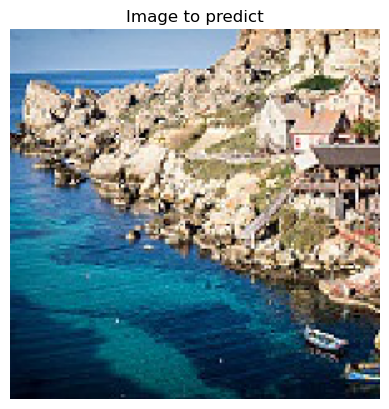



Maximum Probability:  0.9722353
Classification: sea 


Individual Probability:
BUILDINGS : 0.0 %
FOREST : 0.0 %
GLACIER : 2.73 %
MOUNTAIN : 0.03 %
SEA : 97.22 %
STREET : 0.01 %


In [36]:
# Sea class predicions
predict("Landscapes/test/sea/20168.jpg")

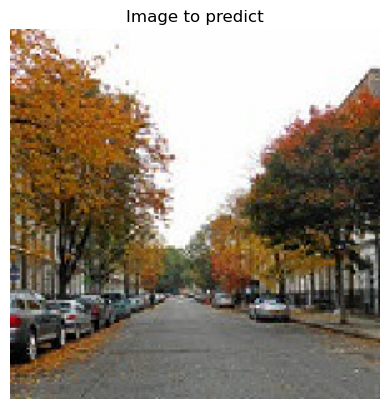



Maximum Probability:  0.86364746
Classification: street 


Individual Probability:
BUILDINGS : 2.05 %
FOREST : 10.7 %
GLACIER : 0.11 %
MOUNTAIN : 0.44 %
SEA : 0.34 %
STREET : 86.36 %


In [37]:
# Street class predictions
predict("Landscapes/test/street/20221.jpg")